### 1. Load The Credit Card Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_csv('Dataset/BankChurners.csv')

In [3]:
churn_data.shape

(10127, 23)

In [4]:
churn_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Remove CLIENTNUM and last 2 columns (to ignore the Naive_Bayes columns as per the author of the dataset)
df = churn_data.iloc[:, 1:-2]

In [6]:
# examine Income_Category values
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [7]:
# Remove $ symbol
df['Income_Category'] = df.Income_Category.str.replace('$', '')

In [8]:
df.head().T

,0,1,2,3,4
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,45,49,51,40,40
Gender,M,F,M,F,M
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Unknown,Married
Income_Category,60K - 80K,Less than 40K,80K - 120K,Less than 40K,60K - 80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21
Total_Relationship_Count,5,6,4,3,5


###  2. Number of Missing Values by Column

In [9]:
# There was no missing value in any column
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### 3. Categorical Features

In [10]:
df.select_dtypes('object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,60K - 80K,Blue
1,Existing Customer,F,Graduate,Single,Less than 40K,Blue
2,Existing Customer,M,Graduate,Married,80K - 120K,Blue
3,Existing Customer,F,High School,Unknown,Less than 40K,Blue
4,Existing Customer,M,Uneducated,Married,60K - 80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,40K - 60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,40K - 60K,Blue
10124,Attrited Customer,F,High School,Married,Less than 40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,40K - 60K,Blue


#### 3.1 Attrition_Flag - Target Feature

In [11]:
# Examine Attrition_Flag feature, no missing value on target feature
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

#### 3.2 Gender

In [12]:
# Examine Gender feature
df.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

#### 3.3 Education_Level

In [13]:
# Examine Education_Level feature
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [14]:
# Examine Unkown value; looks like values were missing randomly
df[df.Education_Level == 'Unknown'].sample(10).T

,4179,3320,3425,9907,5825,9437,155,7685,7744,262
Attrition_Flag,Existing Customer,Attrited Customer,Existing Customer,Attrited Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,51,41,44,45,47,53,42,44,54,43
Gender,M,F,F,F,F,F,F,F,M,M
Dependent_count,3,3,2,3,3,2,5,3,4,4
Education_Level,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
Marital_Status,Single,Married,Married,Single,Single,Married,Married,Single,Married,Married
Income_Category,60K - 80K,Unknown,Less than 40K,Less than 40K,Less than 40K,40K - 60K,40K - 60K,Unknown,80K - 120K,60K - 80K
Card_Category,Silver,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue
Months_on_book,45,35,30,36,38,48,36,33,42,35
Total_Relationship_Count,3,2,3,1,4,2,3,5,3,6


In [15]:
# Missing value on target feature
df.loc[df.Education_Level == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    1263
Attrited Customer     256
Name: Attrition_Flag, dtype: int64

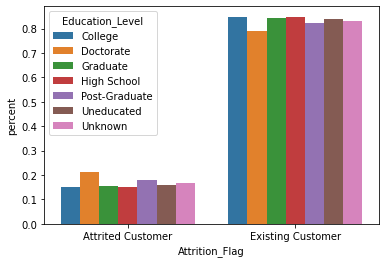

In [16]:
# Examine relationship between Education_Level and Attrited Customer by percentage graph
# It seems like Doctorate and Post-Graduate have higher chance of churning
edu_pct = (df.groupby(['Education_Level', 'Attrition_Flag']).size() / df.groupby('Education_Level').size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='Attrition_Flag', hue='Education_Level', y='percent', data=edu_pct)
plt.show()

In [17]:
# Replace Unknown value with NaN for next stage of analysis
df.Education_Level = df.Education_Level.replace('Unknown', np.nan)

#### 3.4 Marital_Status

In [18]:
#Examine Marital_Status feature
df.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [19]:
# Examine Unkown value; looks like values were missing randomly
df[df.Marital_Status == 'Unknown'].sample(10).T

,5060,7787,4896,6644,8842,4520,8243,6191,6587,9111
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Attrited Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,60,44,53,47,45,49,45,47,61,51
Gender,M,F,M,F,M,F,M,M,F,M
Dependent_count,0,4,4,1,5,1,2,3,1,0
Education_Level,Doctorate,Post-Graduate,College,High School,High School,Uneducated,College,Uneducated,Graduate,High School
Marital_Status,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
Income_Category,40K - 60K,Less than 40K,60K - 80K,Less than 40K,60K - 80K,Less than 40K,40K - 60K,40K - 60K,40K - 60K,80K - 120K
Card_Category,Silver,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue
Months_on_book,53,36,44,41,25,38,36,36,55,44
Total_Relationship_Count,4,3,5,6,1,6,1,3,4,2


In [20]:
# Missing value on target feature
df.loc[df.Marital_Status == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    620
Attrited Customer    129
Name: Attrition_Flag, dtype: int64

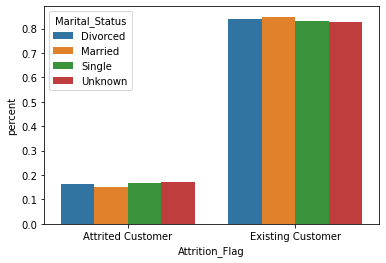

In [21]:
# Examine relationship between Marital_Status and Attrited Customer by percentage graph
# It seems like Married customers have higher chance of churning
mar_pct = (df.groupby(['Marital_Status', 'Attrition_Flag']).size() / df.groupby('Marital_Status').size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='Attrition_Flag', hue='Marital_Status', y='percent', data=mar_pct)
plt.show()

In [22]:
# Replace Unknown value with NaN for next stage of analysis
df.Marital_Status = df.Marital_Status.replace('Unknown', np.nan)

#### 3.5 Income_Category

In [23]:
#Examine Income_Category feature
df.Income_Category.value_counts()

Less than 40K    3561
40K - 60K        1790
80K - 120K       1535
60K - 80K        1402
Unknown          1112
120K +            727
Name: Income_Category, dtype: int64

In [24]:
# Examine Unkown value; looks like values were missing randomly
df[df.Income_Category == 'Unknown'].sample(10).T

,7727,3391,6413,6024,3129,4189,8820,4223,8486,877
Attrition_Flag,Attrited Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Attrited Customer,Attrited Customer,Existing Customer,Attrited Customer,Existing Customer
Customer_Age,44,45,43,34,53,45,47,41,39,42
Gender,F,F,F,F,F,F,F,F,F,F
Dependent_count,4,2,3,1,1,3,4,3,3,2
Education_Level,Uneducated,Doctorate,High School,Graduate,College,High School,College,College,Graduate,Graduate
Marital_Status,Single,Single,Married,Single,Divorced,Single,Divorced,Single,Married,Married
Income_Category,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
Card_Category,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue
Months_on_book,36,36,31,21,36,35,36,36,26,33
Total_Relationship_Count,3,4,3,6,3,3,4,4,2,6


In [25]:
# Missing value on target feature
df.loc[df.Income_Category == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    925
Attrited Customer    187
Name: Attrition_Flag, dtype: int64

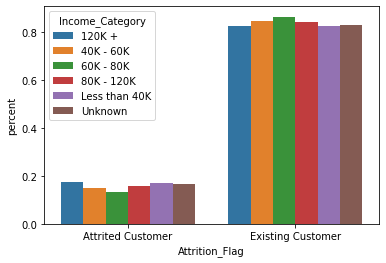

In [26]:
# Examine relationship between Marital_Status and Attrited Customer by percentage graph
# It seems like customers with 120K+ and Less than 40K income have higher chance of churning
inc_pct = (df.groupby(['Income_Category', 'Attrition_Flag']).size() / df.groupby('Income_Category').size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='Attrition_Flag', hue='Income_Category', y='percent', data=inc_pct)
plt.show()

In [27]:
# Replace Unknown value with NaN for next stage of analysis
df.Income_Category = df.Income_Category.replace('Unknown', np.nan)

#### 3.6 Card_Category

In [28]:
#Examine Card_Category feature
df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [29]:
# Number of churning customers per card category
df.loc[df.Attrition_Flag == 'Attrited Customer', 'Card_Category'].value_counts() 

Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64

In [30]:
# Percentage of churning customers by card category. 
# Platinum seems to have a higher churning rate, but there was only 20 cards. The sample was too small to know.
df.loc[df.Attrition_Flag == 'Attrited Customer', 'Card_Category'].value_counts() / df.Card_Category.value_counts()

Blue        0.160979
Silver      0.147748
Gold        0.181034
Platinum    0.250000
Name: Card_Category, dtype: float64

### 4. Numeric Features

In [31]:
# Examine numeric features
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00
Total_Amt_Chng_Q4_Q1,10127.00,0.76,0.22,0.00,0.63,0.74,0.86,3.40


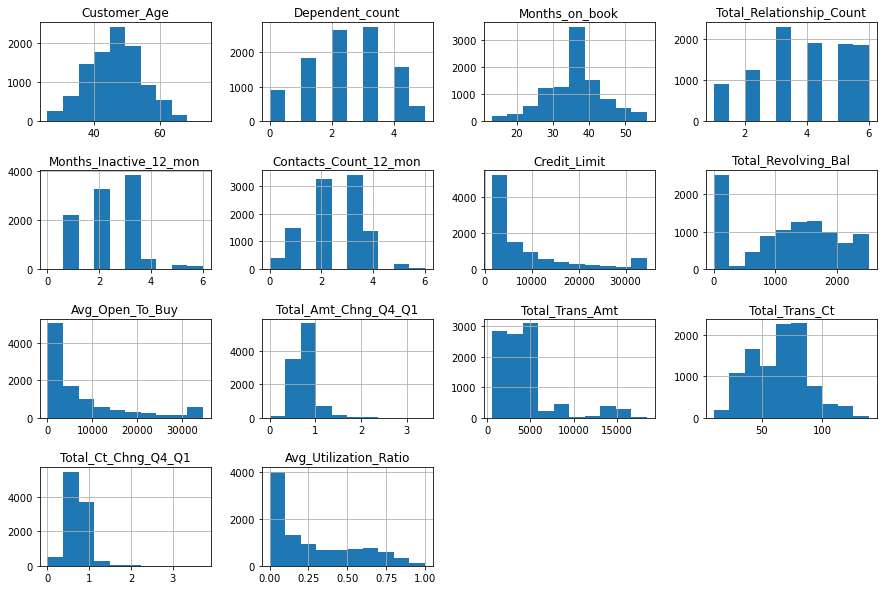

In [32]:
# Examine distribution of numeric features
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### 4.1 Months_on_book

In [33]:
# Number of accounts with 36 months on book was about 7 times higher than the second most frequent value.
# Was there really an enormous credit cards opened 36 months ago?
# Or there was an error in data input?
df.Months_on_book.value_counts().head()

36    2463
37     358
34     353
38     347
39     341
Name: Months_on_book, dtype: int64

In [34]:
# Mean was also 36 months, so it was ok to leave as is
df.Months_on_book.mean()

35.928409203120374

#### 4.2 Month_inactive_12_mon

In [35]:
# Looks like inactive account for 6 months will be closed
df.Months_Inactive_12_mon.value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

In [36]:
# Examine relationship between Months_Inactive_12_mon and Attrition_Flag by percentage
# 0 month of inactive has highest rate of churning; looks like these customers actively decided to move to another card issuers
inactive_pct = (df.groupby(['Attrition_Flag', 'Months_Inactive_12_mon']).size() / df.groupby('Months_Inactive_12_mon').size())
inactive_pct[:7]

Attrition_Flag     Months_Inactive_12_mon
Attrited Customer  0                        0.52
                   1                        0.04
                   2                        0.15
                   3                        0.21
                   4                        0.30
                   5                        0.18
                   6                        0.15
dtype: float64

#### 4.3 Credit_Limit

<AxesSubplot:xlabel='Credit_Limit'>

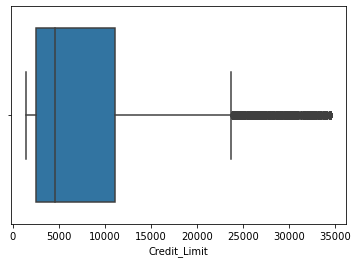

In [37]:
# Examine outliers in Credit_Limit
sns.boxplot(x=df.Credit_Limit)

<AxesSubplot:>

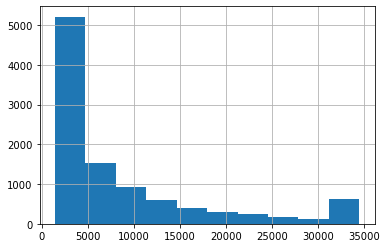

In [38]:
# Examine outliers in Credit_Limit
# The majority of the Credit Limit was below 5,000, this makes the Credit Limit of over $23,000 become outliers
# The value of the outlier looks correct, not from error
df.Credit_Limit.hist()

In [39]:
# Looks like $34,516 and $1,438.30 were the upper and lower limit of credit cards 
df.Credit_Limit.value_counts().head()

34516.00    508
1438.30     507
15987.00     18
9959.00      18
23981.00     12
Name: Credit_Limit, dtype: int64

In [40]:
# $34,516 was the maximum credit limit given to credit cards
df.loc[df.Credit_Limit>34516]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [41]:
# Around 200 Blue and Silver cards have the maximum limit
df.loc[df.Credit_Limit==34516, 'Card_Category'].value_counts()

Silver      221
Blue        198
Gold         74
Platinum     15
Name: Card_Category, dtype: int64

In [42]:
# $1,438.30 was the minimum credit limit credit cards
df.loc[df.Credit_Limit<1438.30]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [43]:
# $1,438.30 was the minimum credit limit for Blue credit cards
df.loc[df.Credit_Limit==1438.30, 'Card_Category'].value_counts()

Blue    507
Name: Card_Category, dtype: int64

#### 4.4 Total_Revolving_Bal

<AxesSubplot:xlabel='Total_Revolving_Bal'>

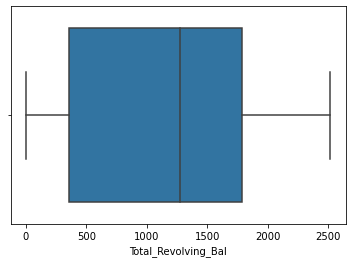

In [44]:
# boxplot shows no outliers
sns.boxplot(x=df.Total_Revolving_Bal)

In [45]:
# The maximum revolving balance was $2,517
df.Total_Revolving_Bal.max()

2517

In [46]:
# around 24% card users paid off their credit card regularly. 5% card holders only paid the minimum requirement.
df.Total_Revolving_Bal.value_counts().head()

0       2470
2517     508
1965      12
1480      12
1720      11
Name: Total_Revolving_Bal, dtype: int64

#### 4.5 Avg_Open_To_Buy

<AxesSubplot:xlabel='Avg_Open_To_Buy'>

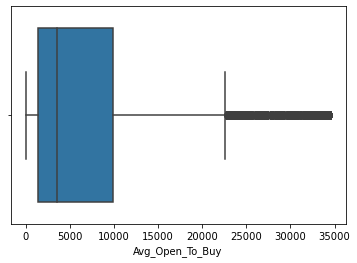

In [47]:
# Examine outliers in Avg_Open_To_Buy
sns.boxplot(x = df.Avg_Open_To_Buy)

<AxesSubplot:>

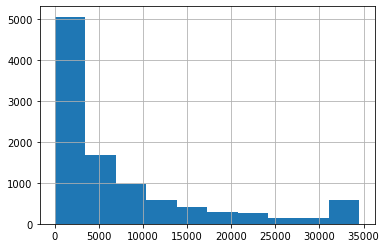

In [48]:
# Ave_Open_To_Buy has distribution similar to Credit_Limit
# It makes sense that Avg_Open_To_Buy would be close to the Credit_Limit
df.Avg_Open_To_Buy.hist()

#### 4.5 Total_Trans_Amt


<AxesSubplot:xlabel='Total_Trans_Amt'>

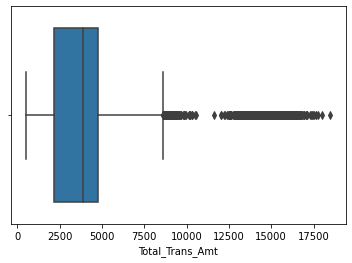

In [49]:
# Examine outliers in Total_Trans_Amt
sns.boxplot(x=df.Total_Trans_Amt)

<AxesSubplot:>

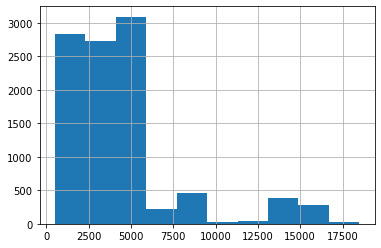

In [50]:
# Examine outliers in Total_Trans_Amt
# The majority of the Total_Trans_Amt was below 6,000, this makes the value of over $6,000 become outliers
# There was around 700 customers with total transactions over 13,000
# this was possible since there was a number of customers with very high credit limit
# The value of the outlier looks correct, not from error
df.Total_Trans_Amt.hist()

### 5. Save Data

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [52]:
df.shape

(10127, 20)

In [53]:
# missing value percentage
(len(df) - df.count())/len(df)*100

Attrition_Flag              0.00
Customer_Age                0.00
Gender                      0.00
Dependent_count             0.00
Education_Level            15.00
Marital_Status              7.40
Income_Category            10.98
Card_Category               0.00
Months_on_book              0.00
Total_Relationship_Count    0.00
Months_Inactive_12_mon      0.00
Contacts_Count_12_mon       0.00
Credit_Limit                0.00
Total_Revolving_Bal         0.00
Avg_Open_To_Buy             0.00
Total_Amt_Chng_Q4_Q1        0.00
Total_Trans_Amt             0.00
Total_Trans_Ct              0.00
Total_Ct_Chng_Q4_Q1         0.00
Avg_Utilization_Ratio       0.00
dtype: float64

In [54]:
df.to_csv('Dataset/BankChurners_cleaned.csv')